<a href="https://colab.research.google.com/github/Justabhi96/advanced_computer_vision/blob/master/05_Object_Localization_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Add pokemon instead of white patch

In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [0]:
!wget -nc https://lazyprogrammer.me/course_files/charmander-tight.png

--2020-02-09 18:32:07--  https://lazyprogrammer.me/course_files/charmander-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3952 (3.9K) [image/png]
Saving to: ‘charmander-tight.png’

charmander-tight.pn 100%[===================>]   3.86K  --.-KB/s    in 0s      

2020-02-09 18:32:12 (83.4 MB/s) - ‘charmander-tight.png’ saved [3952/3952]



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing import image

In [0]:
IMAGE_SIZE = [100, 100, 3]

In [0]:
vgg = VGG16(input_shape = IMAGE_SIZE, weights = "imagenet", include_top = False)

x = Flatten()(vgg.output)
x = Dense(4, activation = "sigmoid")(x)
model = Model(vgg.input, x)

58892288/58889256 [==============================] - 1s 0us/step


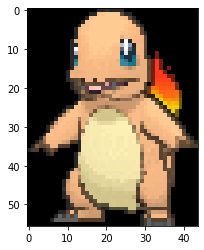

In [0]:
ch_image = image.load_img("charmander-tight.png")
plt.imshow(ch_image)

In [0]:
ch_w = ch_image.width
ch_h = ch_image.height
ch_w, ch_h

(44, 56)

In [0]:
def image_generator(batch_size=64):
  # generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(50):
      X = np.zeros([batch_size] + IMAGE_SIZE)
      Y = np.zeros([batch_size, 4])

      for i in range(batch_size):
        row0 = np.random.randint(0, 100 - ch_h)
        col0 = np.random.randint(0, 100 - ch_w)
        row1 = row0 + ch_h
        col1 = col0 + ch_w

        X[i, row0:row1, col0:col1, :] = ch_image
        Y[i, 0] = row0/100
        Y[i, 1] = col0/100
        Y[i, 2] = (col1-col0)/100
        Y[i, 3] = (row1-row0)/100

      yield X/255.0, Y

In [0]:
model.compile(optimizer=Adam(lr = 0.001), loss = "binary_crossentropy")
model.fit_generator(image_generator(), epochs = 5, steps_per_epoch=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 50 steps
Epoch 1/5
50/50 [==============================] - 20s 394ms/step - loss: 0.8543
Epoch 2/5
50/50 [==============================] - 9s 185ms/step - loss: 0.5896
Epoch 3/5
50/50 [==============================] - 9s 185ms/step - loss: 0.5884
Epoch 4/5
50/50 [==============================] - 9s 187ms/step - loss: 0.5894
Epoch 5/5
50/50 [==============================] - 9s 187ms/step - loss: 0.5874


In [0]:
from matplotlib.patches import Rectangle
def make_prediction():
  row0 = np.random.randint(0, 100 - ch_h)
  col0 = np.random.randint(0, 100 - ch_w)
  row1 = row0 + ch_h
  col1 = col0 + ch_w
  x = np.zeros(IMAGE_SIZE)
  x[row0:row1, col0:col1, :] = ch_image

  X = np.expand_dims(x, 0)
  p = model.predict(X/255.0)[0]
  print((p[0]*100, p[1]*100, p[2]*100, p[3]*100))
  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle((p[1]*100, p[0]*100), p[2]*100, p[3]*100, linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  plt.show()

(14.719332754611969, 0.4526570439338684, 44.304561614990234, 56.1423659324646)


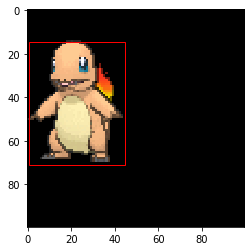

In [0]:
make_prediction()